In [51]:
%load_ext autoreload
%autoreload 2
from utils import WatermarkDataset, ModelTrainer, ModelHandler
import torchvision
from torchvision import transforms
from torchvision.transforms.functional import to_tensor, to_pil_image
import torch
import numpy as np
import matplotlib.pyplot as plt
from torch.utils.data import DataLoader


train_dataset = torchvision.datasets.CIFAR10(
    root= './data', train = True,
    download =True, transform = None)

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload
Files already downloaded and verified


## Example Watermark function
The watermark function must be a function taking in input a numpy array (matrix) and giving in output a numpy array/matrix of same size.

In [ ]:
def red_pixel(t : np.ndarray) -> np.ndarray:
    """Simple Example Watermark in which the top-left pixel is set to red"""
    t[0,0,0] = 255
    t[0,0,1:] = 0

    return t

## Dataset Loading

Usage of WatermarkDataset: give in input a Dataset, the watermarking function and optionally other kind of trtansformations.

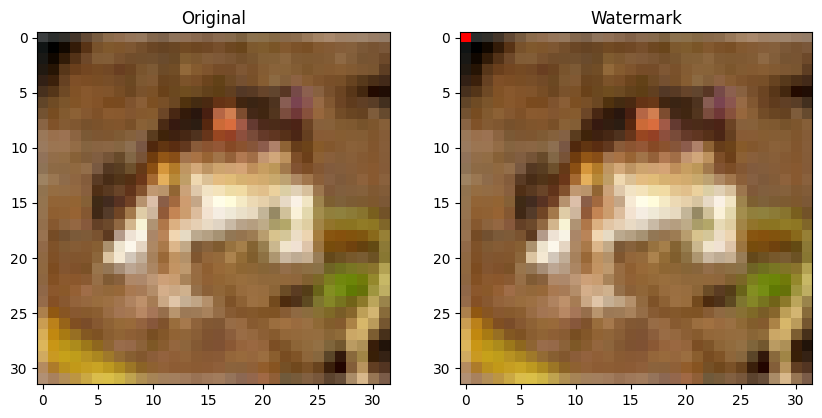

In [72]:
wd = WatermarkDataset(train_dataset, red_pixel, transform=None)

wd.plot_watermark_diff(0)

In [78]:
wd = WatermarkDataset(train_dataset, red_pixel, transform=transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize(
       (0.4914, 0.4822, 0.4465), (0.2023, 0.1994, 0.2010)
    )
]))

wd[0], wd[50001]

((tensor([[[-1.2854e+00, -1.5955e+00, -1.4598e+00,  ...,  6.3375e-01,
             5.1744e-01,  4.3990e-01],
           [-2.1189e+00, -2.4291e+00, -2.0801e+00,  ..., -4.4721e-02,
            -1.2226e-01, -6.4106e-02],
           [-1.9444e+00, -2.1189e+00, -1.4792e+00,  ..., -1.4165e-01,
            -1.0288e-01, -3.1611e-01],
           ...,
           [ 1.6030e+00,  1.4673e+00,  1.4091e+00,  ...,  6.7252e-01,
            -1.3435e+00, -1.4017e+00],
           [ 1.0602e+00,  9.2452e-01,  1.1765e+00,  ...,  1.1378e+00,
            -5.4873e-01, -8.2012e-01],
           [ 1.0021e+00,  8.2760e-01,  1.0408e+00,  ...,  1.7581e+00,
             4.9806e-01, -4.4721e-02]],
  
          [[-1.1989e+00, -1.5136e+00, -1.4742e+00,  ...,  1.7777e-01,
             4.0101e-02,  2.0434e-02],
           [-2.0249e+00, -2.4183e+00, -2.2609e+00,  ..., -6.8757e-01,
            -7.8591e-01, -7.0724e-01],
           [-1.9463e+00, -2.2806e+00, -1.8873e+00,  ..., -7.6624e-01,
            -7.6624e-01, -9.8258e-01],

## 

In [81]:
model_handler = ModelHandler.download_model("chenyaofo/pytorch-cifar-models", 'cifar10_vgg11_bn', 'cpu')

model_handler.finetune(wd)

Using cache found in /home/mamiglia/.cache/torch/hub/chenyaofo_pytorch-cifar-models_master
  0%|          | 0/10 [05:24<?, ?it/s]


KeyboardInterrupt: 